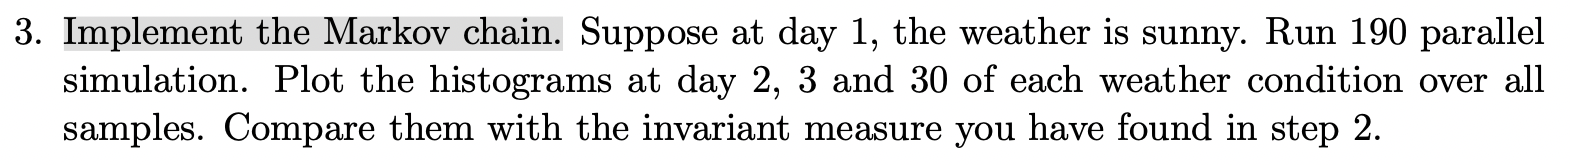

In [58]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import math
import matplotlib.pyplot as plt

We have three possible weather states:  sunny, rainy, or overcast

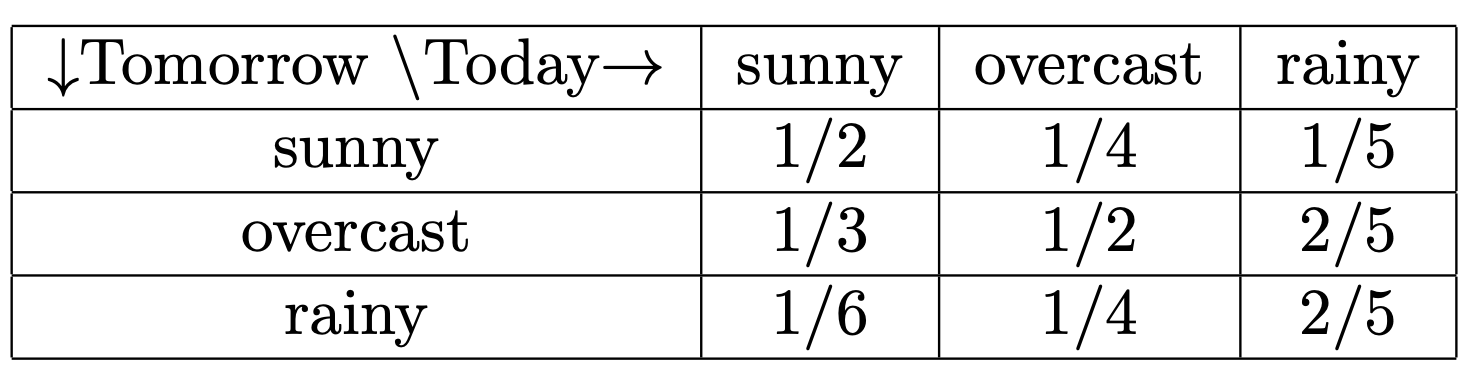

The transition matrix:

In [59]:
P = np.array([[1/2, 1/4, 1/5],   # sunny
              [1/3, 1/2, 2/5],   # rainy
              [1/6, 1/4, 2/5]]).T  # overcast 

In [60]:
print(P[0, :].sum())
print(P[1, :].sum())
print(P[2, :].sum())

0.9999999999999999
1.0
1.0


In [61]:
pi_0 = np.array([[1.0, 0.0, 0.0]]) # sunny weather at the first day

Thus, a distribution over the three possible states for tomorrow:

In [62]:
np.dot(pi_0, P)

array([[0.5       , 0.33333333, 0.16666667]])

Which means that it's likely to be sunny with probability 50%

In [63]:
# look three days into the future
pi_0 = np.array([[1.0, 0.0, 0.0]]) # sunny weather at the first day

for i in range(2):
     pi_0 = np.dot(pi_0, P)
        
pi_0

array([[0.36666667, 0.4       , 0.23333333]])

Which is equal to our computations in the 1st task

## Running 190 parralel computations

In [64]:
pi_0 = np.array([[1.0, 0.0, 0.0]]) # sunny weather at a first day

distribution = []
distribution.append(pi_0)

# look 190 days into the future
for i in range(190):
     pi_0 = np.dot(pi_0, P)
     distribution.append(pi_0)

In [65]:
distribution[:10]

[array([[1., 0., 0.]]),
 array([[0.5       , 0.33333333, 0.16666667]]),
 array([[0.36666667, 0.4       , 0.23333333]]),
 array([[0.33      , 0.41555556, 0.25444444]]),
 array([[0.31977778, 0.41955556, 0.26066667]]),
 array([[0.31691111, 0.42063704, 0.26245185]]),
 array([[0.31610519, 0.4209363 , 0.26295852]]),
 array([[0.31587837, 0.42101995, 0.26310168]]),
 array([[0.31581451, 0.42104344, 0.26314205]]),
 array([[0.31579652, 0.42105004, 0.26315343]])]

## Histogram at day 2

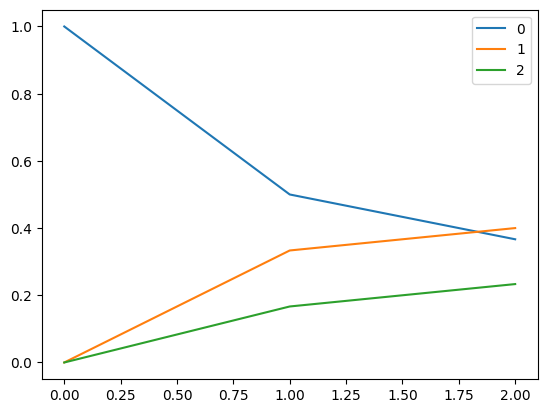

In [66]:
pi_0 = np.array([1,0,0]) # sunny

distribution = []
distribution.append(pi_0)

# look 2 days into the future
for i in range(2):
    pi_0 = np.dot(pi_0, P)
    distribution.append(pi_0)
    
pd.DataFrame(distribution).plot();


## Histogram at day 10


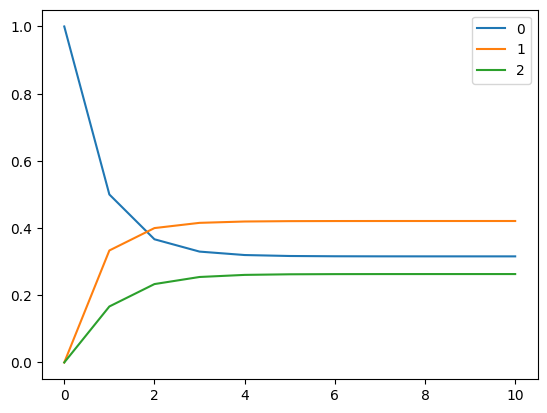

In [67]:
pi_0 = np.array([1,0,0]) # sunny

distribution = []
distribution.append(pi_0)

# look 10 days into the future
for i in range(10):
    pi_0 = np.dot(pi_0, P)
    distribution.append(pi_0)
    
pd.DataFrame(distribution).plot();

## Histogram at day 30

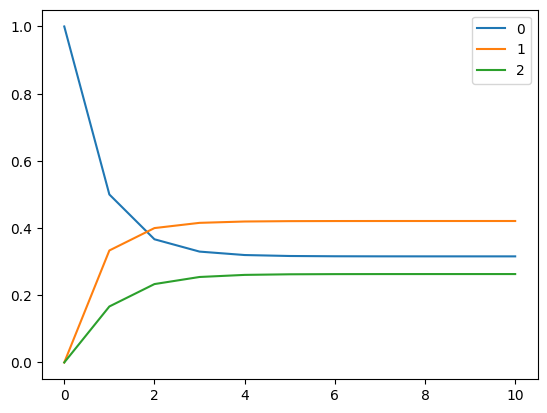

In [68]:
pi_0 = np.array([1,0,0]) # sunny

distribution = []
distribution.append(pi_0)

# look 10 days into the future
for i in range(10):
    pi_0 = np.dot(pi_0, P)
    distribution.append(pi_0)
    
pd.DataFrame(distribution).plot();

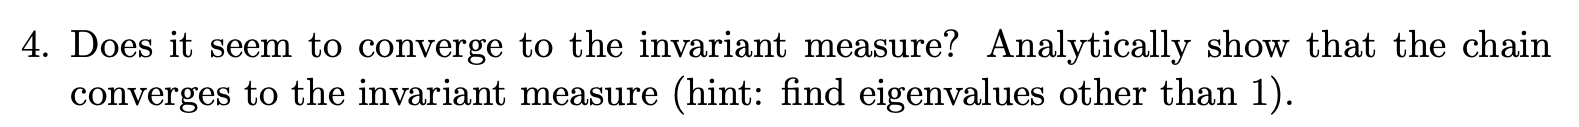

## Computing the invariant measure as in task 2

In [69]:
P = np.array([[1/2, 1/4, 1/5],   # sunny
              [1/3, 1/2, 2/5],   # rainy
              [1/6, 1/4, 2/5]]).T  # overcast 

In [70]:
'''
The sum of each row is 1 =. P matrix is row stochastic.
Let's transpose the matrix to calculate eigenvectors of the stochastic rows.
'''
P_transp = P.T
eigenvalues, eigenvectors = np.linalg.eig(P_transp)

In [71]:
eigenvalues

array([1.        , 0.28164966, 0.11835034])

In [72]:
eigenvectors 

array([[-0.53665631, -0.80703591,  0.21753892],
       [-0.71554175,  0.2961877 , -0.79031741],
       [-0.4472136 ,  0.51084821,  0.57277849]])

In [73]:
'''
Firstly, let's select the indexes of the eigenvalues that are close to one.
Then use them to select the appropriate eigenvectors. 
'''
is_one = np.isclose(eigenvalues, 1)

eigenvector_1 = eigenvectors[:,is_one]
eigenvector_1 = eigenvector_1 [:,0]

# Normalization
invariant_measure = eigenvector_1 / sum(eigenvector_1) 

print("Invariant measure = ", invariant_measure)

Invariant measure =  [0.31578947 0.42105263 0.26315789]


##Proof that the distribution converges to Invariant Distribution:

In [74]:
np.dot(invariant_measure, P)

array([0.31578947, 0.42105263, 0.26315789])

In [75]:
invariant_measure

array([0.31578947, 0.42105263, 0.26315789])

In [76]:
distribution

[array([1, 0, 0]),
 array([0.5       , 0.33333333, 0.16666667]),
 array([0.36666667, 0.4       , 0.23333333]),
 array([0.33      , 0.41555556, 0.25444444]),
 array([0.31977778, 0.41955556, 0.26066667]),
 array([0.31691111, 0.42063704, 0.26245185]),
 array([0.31610519, 0.4209363 , 0.26295852]),
 array([0.31587837, 0.42101995, 0.26310168]),
 array([0.31581451, 0.42104344, 0.26314205]),
 array([0.31579652, 0.42105004, 0.26315343]),
 array([0.31579146, 0.4210519 , 0.26315664])]

Therefore, according to the distribution the chain converges to the invariant measure and close to it on 5th day

  # Ex 6


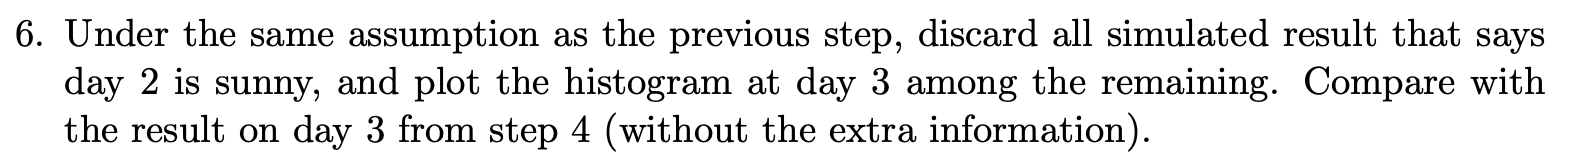

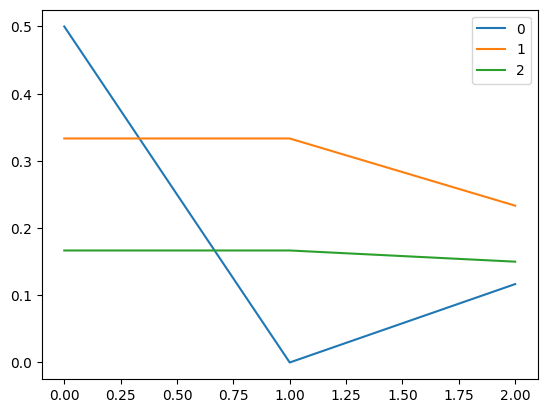

In [77]:
# start out sunny
pi_0  = np.array([1,0,0]) # sunny

distribution = []

# look years into the future
for i in range(3):
  if i == 1:
    pi_0  = np.dot(pi_0 , P)
    pi_0 [0] = 0
    distribution.append(pi_0 )
  else: 
    state = np.dot(pi_0 , P)
    distribution.append(state)
    
pd.DataFrame(distribution).plot();


# Ex 7

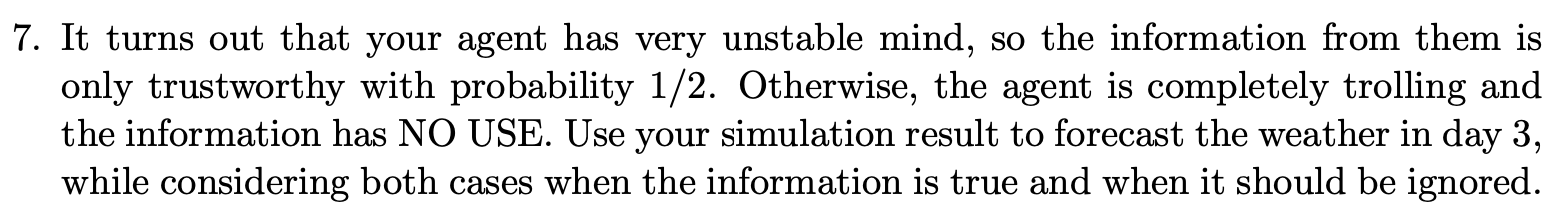

[0.5        0.33333333 0.16666667]
[0.25       0.16666667 0.08333333]
[0. 0. 0.]


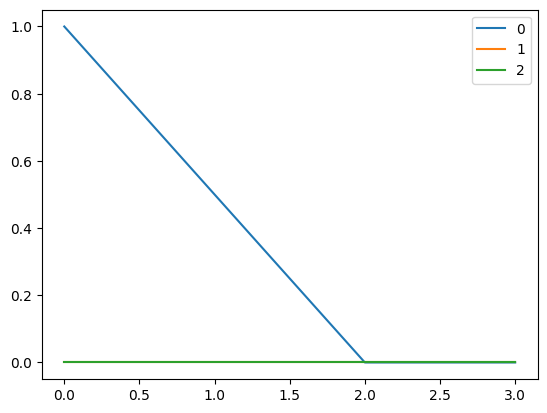

In [79]:

pi_0 = np.array([1,0,0]) # sunny

distribution = []
distribution.append(pi_0)

# look 3 days into the future
for i in range(3):
  pi_0 = np.dot(pi_0, P)
  print(pi_0)
  for p in range(len(pi_0)):
    if pi_0[p] != 0.5:
        pi_0[p] = 0
  distribution.append(pi_0)

    
pd.DataFrame(distribution).plot();


In [80]:
distribution

[array([1, 0, 0]),
 array([0.5, 0. , 0. ]),
 array([0., 0., 0.]),
 array([0., 0., 0.])]

## Second approach (idk which is right)

[0.5        0.33333333 0.16666667]
[0.36666667 0.4        0.23333333]
[0. 0. 0.]


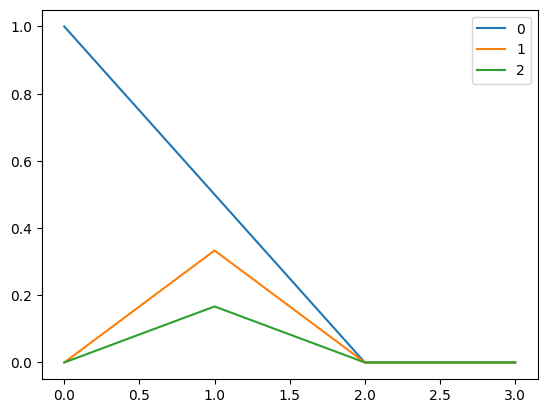

In [81]:

pi_0 = np.array([1,0,0]) # sunny

distribution = []
distribution.append(pi_0)

# look into the future
for i in range(3):
  k = 0
  pi_0 = np.dot(pi_0, P)
  print(pi_0)
  for p in range(len(pi_0)):
    if pi_0[p] == 0.5:
       k = 1
  if k != 1:
    pi_0 = np.array([0,0,0])
  
  distribution.append(pi_0)
    
pd.DataFrame(distribution).plot();


In [82]:
distribution


[array([1, 0, 0]),
 array([0.5       , 0.33333333, 0.16666667]),
 array([0, 0, 0]),
 array([0, 0, 0])]